In [1]:
import torch
from torchvision import datasets, transforms
import helper

from torch import nn, optim
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

C:\Users\Yoga\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


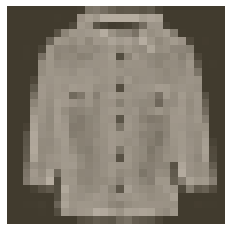

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [4]:
model= Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 480.2433726936579
Training loss: 369.4928957670927
Training loss: 332.7066109627485
Training loss: 314.43672524392605
Training loss: 296.05540558695793


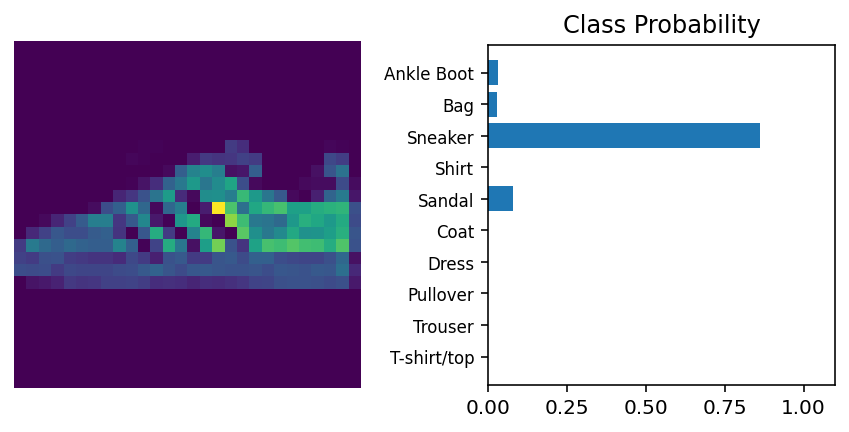

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter= iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

In [7]:
model = Classifier()
images, labels = next(iter(testloader))
ps = torch.exp(model(images))
print(ps.shape)

top_p, top_class = ps.topk(1, dim=1)
print((top_class[:10, :]))
equals = top_class == labels.view(*top_class.shape)

torch.Size([64, 10])
tensor([[6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [0],
        [6]])


In [8]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print("Accuracy : ", accuracy.item()*100," %")

Accuracy :  12.5  %


In [9]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in trainloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch : {}/{}.. ".format(e+1, epochs),
              "Running Loss: {:.3f}.. ".format(running_loss),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch : 1/5..  Running Loss: 484.599..  Training Loss: 0.517..  Test Loss: 2.664..  Test Accuracy: 5.027
Epoch : 2/5..  Running Loss: 367.250..  Training Loss: 0.392..  Test Loss: 2.203..  Test Accuracy: 5.165
Epoch : 3/5..  Running Loss: 332.479..  Training Loss: 0.354..  Test Loss: 1.923..  Test Accuracy: 5.273
Epoch : 4/5..  Running Loss: 310.406..  Training Loss: 0.331..  Test Loss: 1.905..  Test Accuracy: 5.277
Epoch : 5/5..  Running Loss: 294.665..  Training Loss: 0.314..  Test Loss: 1.902..  Test Accuracy: 5.277
